In [ ]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init
import pandas as pd
#from google.colab import drive
from torch import nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# MOUNT YOUR GOOGLE DRIVE 
# (It only mounts to your private Virtual Machine, it doesn't expose your drive to anyone else)
#drive.mount('/content/drive')

In [ ]:
#df_econ = pd.read_pickle("/content/drive/My Drive/Data Mining Project - Share/Processed_Data/df_econ.pandas")
#df_covid = pd.read_pickle("/content/drive/My Drive/Data Mining Project - Share/Processed_Data/df_covid.pandas")

#df_econ = pd.read_pickle("/content/drive/My Drive/Data Mining Project - Share/Processed_Data/df_econ.pandas")
#df_covid = pd.read_pickle("/content/drive/My Drive/Data Mining Project - Share/Processed_Data/df_covid.pandas")

df_econ = pd.read_csv("df_econ.csv", index_col=0)
df_covid = pd.read_csv("df_covid.csv", index_col=0)
df_states = pd.read_csv("df_states.csv", index_col=0)

df_econ_shift = pd.read_csv("df_econ_shift1.csv", index_col=0)

In [ ]:
print(df_econ.shape)
df_econ_state = pd.concat([df_econ, df_states], axis=1)
df_econ_state.index = pd.to_datetime(df_econ_state.index, format="%Y-%m-%d")
df_econ_state.reset_index(inplace=True)
df_econ_state.set_index(["statefips","Date"], inplace=True)
df_econ_state.sort_index(inplace=True)
print(df_econ_state.index.levels[0].dtype)
print(df_econ_state.shape)

df_covid_state = pd.concat([df_covid, df_states], axis=1)
df_covid_state.index = pd.to_datetime(df_covid_state.index, format="%Y-%m-%d")
df_covid_state.reset_index(inplace=True)
df_covid_state.set_index(["statefips","Date"], inplace=True)
df_covid_state.sort_index(inplace=True)

df_econ_shift_state = pd.concat([df_econ_shift7, df_states], axis=1)
df_econ_shift_state.index = pd.to_datetime(df_econ_shift_state.index, format="%Y-%m-%d")
df_econ_shift_state.reset_index(inplace=True)
df_econ_shift_state.set_index(["statefips","Date"], inplace=True)
df_econ_shift_state.sort_index(inplace=True)

(13464, 55)
int64
(13464, 55)


In [ ]:
display(df_econ_state.head())
display(df_covid_state.head())
display(df_econ_shift7_state.head())

spend_acf  spend_aer  spend_all  spend_apg  spend_grf  \
statefips Date                                                                
1         2020-02-11    -0.0272     0.0713   -0.00436   0.000876     0.0338   
          2020-02-12    -0.0336     0.1340    0.00352   0.008350     0.0595   
          2020-02-13    -0.0290     0.1750    0.00319   0.014700     0.0510   
          2020-02-14    -0.0431     0.1100   -0.00231  -0.000802     0.0408   
          2020-02-15    -0.0395     0.0635   -0.01530  -0.030200     0.0289   

                      spend_hcs  spend_tws  spend_all_inchigh  \
statefips Date                                                  
1         2020-02-11    -0.0841    -0.0594           -0.01140   
          2020-02-12    -0.0910    -0.0531           -0.00871   
          2020-02-13    -0.1130    -0.0746           -0.00605   
          2020-02-14    -0.0976    -0.0807           -0.02280   
          2020-02-15    -0.0904    -0.0968           -0.03360   

                      spend_all_inclow  spend_all_incmiddle  ...  \
statefips Date                                               ...   
1         2020-02-11         -0.002400             -0.00836  ...   
          2020-02-12          0.015900             -0.00184  ...   
          2020-02-13          0.015200             -0.00419  ...   
          2020-02-14          0.013200             -0.01080  ...   
          2020-02-15         -0.000168             -0.02610  ...   

                      bg_posts_ss60  bg_posts_ss65  bg_posts_ss70  \
statefips Date                                                      
1         2020-02-11       0.040857       0.021000       0.133429   
          2020-02-12       0.125571       0.110000       0.192286   
          2020-02-13       0.210286       0.199000       0.251143   
          2020-02-14       0.201000       0.002950       0.281000   
          2020-02-15       0.166114       0.209714       0.130143   

                      bg_posts_jz1  bg_posts_jzgrp12  bg_posts_jz2  \
statefips Date                                                       
1         2020-02-11      0.304200          0.017714     -0.003429   
          2020-02-12      0.375800          0.093143      0.071714   
          2020-02-13      0.447400          0.168571      0.146857   
          2020-02-14      0.133000          0.096400      0.093800   
          2020-02-15      0.373143          0.133843      0.113543   

                      bg_posts_jz3  bg_posts_jzgrp345  bg_posts_jz4  \
statefips Date                                                        
1         2020-02-11      0.041286           0.060714      0.057000   
          2020-02-12      0.113857           0.138143      0.132000   
          2020-02-13      0.186429           0.215571      0.207000   
          2020-02-14      0.075500           0.114000      0.220000   
          2020-02-15      0.214000           0.183629      0.158836   

                      bg_posts_jz5  
statefips Date                      
1         2020-02-11      0.139286  
          2020-02-12      0.241857  
          2020-02-13      0.344429  
          2020-02-14     -0.053900  
          2020-02-15      0.165857  

[5 rows x 55 columns]

case_rate  death_rate  test_rate  new_positives_rate  \
statefips Date                                                               
1         2020-02-11        0.0         0.0        0.0                 0.0   
          2020-02-12        0.0         0.0        0.0                 0.0   
          2020-02-13        0.0         0.0        0.0                 0.0   
          2020-02-14        0.0         0.0        0.0                 0.0   
          2020-02-15        0.0         0.0        0.0                 0.0   

                      new_case_rate  new_death_rate  new_test_rate  \
statefips Date                                                       
1         2020-02-11            0.0             0.0            0.0   
          2020-02-12            0.0             0.0            0.0   
          2020-02-13            0.0             0.0            0.0   
          2020-02-14            0.0             0.0            0.0   
          2020-02-15            0.0             0.0            0.0   

                      new_case_count  new_death_count  new_test_count  ...  \
statefips Date                                                         ...   
1         2020-02-11             0.0              0.0             0.0  ...   
          2020-02-12             0.0              0.0             0.0  ...   
          2020-02-13             0.0              0.0             0.0  ...   
          2020-02-14             0.0              0.0             0.0  ...   
          2020-02-15             0.0              0.0             0.0  ...   

                      new_test_rate_10  new_case_count_3  new_case_count_7  \
statefips Date                                                               
1         2020-02-11               0.0               0.0               0.0   
          2020-02-12               0.0               0.0               0.0   
          2020-02-13               0.0               0.0               0.0   
          2020-02-14               0.0               0.0               0.0   
          2020-02-15               0.0               0.0               0.0   

                      new_case_count_10  new_death_count_3  new_death_count_7  \
statefips Date                                                                  
1         2020-02-11                0.0                0.0                0.0   
          2020-02-12                0.0                0.0                0.0   
          2020-02-13                0.0                0.0                0.0   
          2020-02-14                0.0                0.0                0.0   
          2020-02-15                0.0                0.0                0.0   

                      new_death_count_10  new_test_count_3  new_test_count_7  \
statefips Date                                                                 
1         2020-02-11                 0.0               0.0               0.0   
          2020-02-12                 0.0               0.0               0.0   
          2020-02-13                 0.0               0.0               0.0   
          2020-02-14                 0.0               0.0               0.0   
          2020-02-15                 0.0               0.0               0.0   

                      new_test_count_10  
statefips Date                           
1         2020-02-11                0.0  
          2020-02-12                0.0  
          2020-02-13                0.0  
          2020-02-14                0.0  
          2020-02-15                0.0  

[5 rows x 40 columns]

spend_acf_1  spend_aer_1  spend_all_1  spend_apg_1  \
statefips Date                                                             
1         2020-02-11          NaN          NaN          NaN          NaN   
          2020-02-12      -0.0272       0.0713     -0.00436     0.000876   
          2020-02-13      -0.0336       0.1340      0.00352     0.008350   
          2020-02-14      -0.0290       0.1750      0.00319     0.014700   
          2020-02-15      -0.0431       0.1100     -0.00231    -0.000802   

                      spend_grf_1  spend_hcs_1  spend_tws_1  \
statefips Date                                                
1         2020-02-11          NaN          NaN          NaN   
          2020-02-12       0.0338      -0.0841      -0.0594   
          2020-02-13       0.0595      -0.0910      -0.0531   
          2020-02-14       0.0510      -0.1130      -0.0746   
          2020-02-15       0.0408      -0.0976      -0.0807   

                      spend_all_inchigh_1  spend_all_inclow_1  \
statefips Date                                                  
1         2020-02-11                  NaN                 NaN   
          2020-02-12             -0.01140             -0.0024   
          2020-02-13             -0.00871              0.0159   
          2020-02-14             -0.00605              0.0152   
          2020-02-15             -0.02280              0.0132   

                      spend_all_incmiddle_1  ...  bg_posts_ss60_1  \
statefips Date                               ...                    
1         2020-02-11                    NaN  ...              NaN   
          2020-02-12               -0.00836  ...         0.040857   
          2020-02-13               -0.00184  ...         0.125571   
          2020-02-14               -0.00419  ...         0.210286   
          2020-02-15               -0.01080  ...         0.201000   

                      bg_posts_ss65_1  bg_posts_ss70_1  bg_posts_jz1_1  \
statefips Date                                                           
1         2020-02-11              NaN              NaN             NaN   
          2020-02-12          0.02100         0.133429          0.3042   
          2020-02-13          0.11000         0.192286          0.3758   
          2020-02-14          0.19900         0.251143          0.4474   
          2020-02-15          0.00295         0.281000          0.1330   

                      bg_posts_jzgrp12_1  bg_posts_jz2_1  bg_posts_jz3_1  \
statefips Date                                                             
1         2020-02-11                 NaN             NaN             NaN   
          2020-02-12            0.017714       -0.003429        0.041286   
          2020-02-13            0.093143        0.071714        0.113857   
          2020-02-14            0.168571        0.146857        0.186429   
          2020-02-15            0.096400        0.093800        0.075500   

                      bg_posts_jzgrp345_1  bg_posts_jz4_1  bg_posts_jz5_1  
statefips Date                                                             
1         2020-02-11                  NaN             NaN             NaN  
          2020-02-12             0.060714           0.057        0.139286  
          2020-02-13             0.138143           0.132        0.241857  
          2020-02-14             0.215571           0.207        0.344429  
          2020-02-15             0.114000           0.220       -0.053900  

[5 rows x 55 columns]

In [ ]:
"""inputsAL = df_covid[df_covid.index.isin(["1"], level=1)]
display(inputsAL)

targetsAL = df_econ[df_econ.index.isin(["1"], level=1)]
display(targetsAL)

targetsAL.fillna(method='backfill', axis=0, inplace=True)

inputsAL_concat = pd.concat([inputsAL, targetsAL.shift(-7)], axis=1)
display(inputsAL_concat)"""

df_econ_condensed = df_econ_state.filter(["spend_all", "revenue_all", "emp_combined"], axis=1)
### IF SHIFT 7, THEN ADJUST THE NUMBERS HERE:
df_econ_shift_condensed = df_econ_shift_state.filter(["spend_all_1", "revenue_all_1", "emp_combined_1"], axis=1)
display(df_econ_shift7_condensed.isna().any(axis=1))

df_inputs = df_covid_state.copy() #.loc[1]
df_targets = df_econ_condensed.copy() #.loc[1]
display(df_inputs)

print(df_inputs.shape, df_targets.shape, df_econ_shift.shape)
print(df_econ_shift_condensed[df_econ_shift_condensed.isna().any(axis=1)])
dates_to_drop = df_econ_shift_condensed[df_econ_shift_condensed.isna().any(axis=1)].index.unique(level=1)
print(dates_to_drop)

### UNCOMMENT TO RUN WITH SHIFT
#df_inputs.drop(dates_to_drop, axis=0, level=1, inplace=True)
#df_targets.drop(dates_to_drop, axis=0, level=1, inplace=True)
#df_econ_shift_condensed.drop(dates_to_drop, axis=0, level=1, inplace=True)

df_econ_shift_condensed.dropna(axis=0, inplace=True)
print(df_inputs.shape, df_targets.shape, df_econ_shift_condensed.shape)

### COMMENT TO RUN WITH SHIFT
inputs = df_inputs.to_numpy()
### UNCOMMENT TO RUN WITH SHIFT
#inputs = np.concatenate((df_inputs.to_numpy(), np.zeros_like(df_econ_shift_condensed.to_numpy())), axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
row_index = 0
for state in df_inputs.index.unique(level=0):
    date_count = df_inputs.loc[state].shape[0]
    ### UNCOMMENT TO RUN WITH SHIFT
    #inputs[row_index:row_index+date_count-1,-df_econ_shift_condensed.shape[1]:] = df_econ_shift_condensed.iloc[row_index:row_index+date_count-1,0:df_econ_shift_condensed.shape[1]]
    inputs[row_index:row_index+date_count,:] = scaler.fit_transform(inputs[row_index:row_index+date_count,:])
    row_index += date_count

#inputsAL_normalized = scaler.fit_transform(inputsAL_concat)
display(inputs)


scaler2 = MinMaxScaler(feature_range=(0, 1))
#scaler2.fit(targetsAL)

targets = df_targets.to_numpy()
row_index=0
for state in df_inputs.index.unique(level=0):
    date_count = df_inputs.loc[state].shape[0]
    scaler2.fit(df_targets.loc[state])
    targets[row_index:row_index+date_count] = scaler2.transform(df_targets[row_index:row_index+date_count])
    row_index += date_count
#targetsAL_normalized = scaler2.transform(targetsAL)
display(df_targets)
#display(targets)



statefips  Date      
1          2020-02-11     True
           2020-02-12    False
           2020-02-13    False
           2020-02-14    False
           2020-02-15    False
                         ...  
56         2020-10-27    False
           2020-10-28    False
           2020-10-29    False
           2020-10-30    False
           2020-10-31    False
Length: 13464, dtype: bool

case_rate  death_rate  test_rate  new_positives_rate  \
statefips Date                                                               
1         2020-02-11        0.0         0.0        0.0              0.0000   
          2020-02-12        0.0         0.0        0.0              0.0000   
          2020-02-13        0.0         0.0        0.0              0.0000   
          2020-02-14        0.0         0.0        0.0              0.0000   
          2020-02-15        0.0         0.0        0.0              0.0000   
...                         ...         ...        ...                 ...   
56        2020-10-27     2040.0        13.3    21683.0              1.0000   
          2020-10-28     2099.0        13.3    21742.0              1.0000   
          2020-10-29     2161.0        15.0    22369.0              0.0994   
          2020-10-30     2251.0        15.0    22459.0              1.0000   
          2020-10-31     2298.0        15.0    22559.0              0.4680   

                      new_case_rate  new_death_rate  new_test_rate  \
statefips Date                                                       
1         2020-02-11            0.0           0.000            0.0   
          2020-02-12            0.0           0.000            0.0   
          2020-02-13            0.0           0.000            0.0   
          2020-02-14            0.0           0.000            0.0   
          2020-02-15            0.0           0.000            0.0   
...                             ...             ...            ...   
56        2020-10-27           56.3           0.395          178.0   
          2020-10-28           56.7           0.395          103.0   
          2020-10-29           58.9           0.469          186.0   
          2020-10-30           61.3           0.469          142.0   
          2020-10-31           61.5           0.469          150.0   

                      new_case_count  new_death_count  new_test_count  ...  \
statefips Date                                                         ...   
1         2020-02-11             0.0             0.00             0.0  ...   
          2020-02-12             0.0             0.00             0.0  ...   
          2020-02-13             0.0             0.00             0.0  ...   
          2020-02-14             0.0             0.00             0.0  ...   
          2020-02-15             0.0             0.00             0.0  ...   
...                              ...              ...             ...  ...   
56        2020-10-27           326.0             2.29          1030.0  ...   
          2020-10-28           328.0             2.29           595.0  ...   
          2020-10-29           341.0             2.71          1074.0  ...   
          2020-10-30           355.0             2.71           822.0  ...   
          2020-10-31           356.0             2.71           867.0  ...   

                      new_test_rate_10  new_case_count_3  new_case_count_7  \
statefips Date                                                               
1         2020-02-11               0.0               0.0               0.0   
          2020-02-12               0.0               0.0               0.0   
          2020-02-13               0.0               0.0               0.0   
          2020-02-14               0.0               0.0               0.0   
          2020-02-15               0.0               0.0               0.0   
...                                ...               ...               ...   
56        2020-10-27             171.0             284.0             223.0   
          2020-10-28             173.0             288.0             239.0   
          2020-10-29             175.0             309.0             249.0   
          2020-10-30             110.0             326.0             269.0   
          2020-10-31             263.0             328.0             284.0   

                      new_case_count_10  new_death_count_3  new_de

(13464, 40) (13464, 3) (13464, 55)
                      spend_all_1  revenue_all_1  emp_combined_1
statefips Date                                                  
1         2020-02-11          NaN            NaN             NaN
2         2020-02-11          NaN            NaN             NaN
4         2020-02-11          NaN            NaN             NaN
5         2020-02-11          NaN            NaN             NaN
6         2020-02-11          NaN            NaN             NaN
8         2020-02-11          NaN            NaN             NaN
9         2020-02-11          NaN            NaN             NaN
10        2020-02-11          NaN            NaN             NaN
11        2020-02-11          NaN            NaN             NaN
12        2020-02-11          NaN            NaN             NaN
13        2020-02-11          NaN            NaN             NaN
15        2020-02-11          NaN            NaN             NaN
16        2020-02-11          NaN            NaN       

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94038294, 1.        , 0.99157764, ..., 0.6657912 , 0.52068286,
        0.664478  ],
       [0.97954743, 1.        , 0.99556718, ..., 0.67629678, 0.63887065,
        0.41628365],
       [1.        , 1.        , 1.        , ..., 0.3906763 , 0.64937623,
        0.9986868 ]])

spend_all  revenue_all  emp_combined
statefips Date                                            
1         2020-02-11   0.720391     0.948463      0.978172
          2020-02-12   0.739658     0.997904      0.979144
          2020-02-13   0.738851     1.000000      0.979922
          2020-02-14   0.725403     0.968204      0.980457
          2020-02-15   0.693643     0.946366      0.981186
...                         ...          ...           ...
56        2020-10-27   0.574036     0.399610      0.619332
          2020-10-28   0.574036     0.399610      0.619332
          2020-10-29   0.574036     0.399610      0.619332
          2020-10-30   0.574036     0.399610      0.619332
          2020-10-31   0.574036     0.399610      0.619332

[13464 rows x 3 columns]

In [ ]:
# See https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/
# and https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/

class Model(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1, num_layers=1, device=None):
        super().__init__()

        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_size=hidden_layer_size, num_layers=num_layers)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(num_layers,1,self.hidden_layer_size).to(device),
                            torch.zeros(num_layers,1,self.hidden_layer_size).to(device))
        
        self.n_layers = num_layers

        self.device = device

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), (self.hidden_cell[0].detach(), self.hidden_cell[1].detach()))
        #lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)

        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        self.hidden_cell = (torch.zeros(self.n_layers,1,self.hidden_layer_size).to(self.device),
                            torch.zeros(self.n_layers,1,self.hidden_layer_size).to(self.device))
        

In [ ]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"

device = torch.device(dev)

torchInputs = torch.from_numpy(inputs).float().to(device)
torchTargets = torch.from_numpy(targets).float().to(device)

### HYPERPARAMETERS TO TRY ADJUSTING
# Instantiate the model with hyperparameters
model = Model(input_size=torchInputs.shape[1], output_size=torchTargets.shape[1], hidden_layer_size=150, num_layers=2, device=device)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)
model = model.float()

### 
# Define hyperparameters
n_epochs = 50
lr=0.01

# Define Loss, Optimizer
loss_function = nn.L1Loss()
#optimizer = torch.optim.Adam(model.parameters(), lr=lr)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.1, weight_decay=0.0001, dampening=0.0005)
#optimizer = torch.optim.Adagrad(model.parameters(), lr=lr, weight_decay=0.0001, lr_decay=lr/100)

In [ ]:
#inputsAL_normalized_appended = inputsAL_normalized

In [ ]:
use_all_records = True
# COMMENT PROVIDE ALL OF THE RECORDS
if (not use_all_records):
  records_to_provide = 7

#print(torchInputs[:100,:])
print(torchInputs[0,:])
#print(torchTargets[:100])
print(torchTargets[0])

train_size = 50
idx = pd.IndexSlice

states = df_inputs.index.unique(level=0)
#states = states[0:5]
#dates = df_inputs.index.unique()
dates = df_inputs.index.unique(level=1)
train_date = "2020-08-15"

epoch_losses = []

for epoch in range(n_epochs):
  #optimizer.zero_grad()
  model.init_hidden(1)
  full_loss = 0
  input_locations = 0
  row_index = 0

  state_i = 0
  dates_counted = 0

  #np.random.shuffle(states)

  for state in states:
    # USE ALL TRAINING HISTORY
    if (use_all_records):
      records_to_provide=df_inputs.index.get_loc((state, train_date))-1-row_index

    #for date_index in range(records_to_provide, min(torchInputs.shape[0], train_size)):
    date_count = df_inputs.loc[state].shape[0]
    #date_j = 0
    dates_iterator = np.arange(date_count)
    #np.random.shuffle(dates_iterator)
    model.init_hidden(1)

    for date_j in range(records_to_provide, date_count):
      if (date_j < records_to_provide):
        continue
      #elif (date_j > train_size+records_to_provide):
      #  break
      elif (df_inputs.loc[state].index[date_j] >= np.datetime64(train_date)):
        #print("Breaking")
        break

      #date_range = np.arange(date_index-pd.DateOffset(days=records_to_provide), date_index)
      #input_locations = df_covid_state.index.get_locs((date_range, state))
      input_locations = np.arange(row_index + date_j - records_to_provide+1, row_index + date_j+1)

      #print(input_locations)

      optimizer.zero_grad()
      #model.hidden_cell = (torch.zeros(model.n_layers, 1, model.hidden_layer_size),
      #                     torch.zeros(model.n_layers, 1, model.hidden_layer_size))

      # Use day -7 to day 0 to predict
      #model.hidden_cell[0].detach()
      #model.hidden_cell[1].detach()

      y_pred = model(torchInputs.narrow(0,row_index + date_j - records_to_provide+1, records_to_provide).view(records_to_provide,-1).float())

      # Compare to target of day 0
      single_loss = loss_function(y_pred, torchTargets[row_index + date_j,:].float())
      single_loss.backward()
      optimizer.step()

      input_locations += 1
      dates_counted += 1

      full_loss += single_loss.item()

      #date_j += 1
    state_i += 1
    row_index += date_count

  if (epoch==0):
    print("Stopped after {0} dates".format(dates_counted))

  if epoch%5 == 0:
      print(f'epoch: {epoch:3} loss: {single_loss.item():10.8f}')
      print("Average Loss over Time Series: {0}".format(full_loss / (dates_counted)))

  epoch_losses.append(full_loss / (dates_counted))
  

print(f'epoch: {epoch:3} loss: {single_loss.item():10.10f}')

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
tensor([0.7204, 0.9485, 0.9782], device='cuda:0')
Stopped after 51 dates
epoch:   0 loss: 0.33897492
Average Loss over Time Series: 0.45588678735144
epoch:   5 loss: 0.13428466
Average Loss over Time Series: 0.099800757808136
epoch:  10 loss: 0.12556100
Average Loss over Time Series: 0.0982020319457732
epoch:  15 loss: 0.12527281
Average Loss over Time Series: 0.09658116135088836
epoch:  20 loss: 0.12453886
Average Loss over Time Series: 0.09503721087878826
epoch:  25 loss: 0.12268823
Average Loss over Time Series: 0.09370134518865277
epoch:  30 loss: 0.11117645
Average Loss over Time Series: 0.09242352671629074
epoch:  35 loss: 0.10330748
Average Loss over Time Series: 0.09173492670935743
epoch:  40 loss: 0.09969117
Average Loss over Time Series: 0.09106154031321115
epoch:  45 loss: 0.09

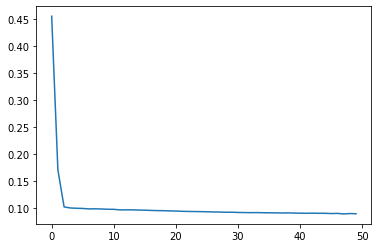

In [ ]:
plt.plot(np.arange(len(epoch_losses)), epoch_losses)

In [ ]:
test_index = 0
test_inputs = torchInputs[test_index-7:test_index,:]
test_outputs = {"spend_all": [], "revenue_all": [], "emp_combined": [] }
test_pred_outputs = {"spend_all": [], "revenue_all": [], "emp_combined": [] }
test_count = 31

predicted_outputs = np.empty(shape=(0,targets.shape[1],test_count))

state_i = 0

model.eval()
row_index=0
for state in states:
  test_index = df_inputs.index.get_loc((state, train_date))
  print(test_index)

  predicted_outputs_state = np.empty(shape=(targets.shape[1],test_count))
  date_count = df_inputs.loc[state].shape[0]

  model.init_hidden(1)
  for i in range(records_to_provide+row_index,test_index):
    model(torchInputs[np.arange(i-records_to_provide, i)])

  for i in range(test_count):

    with torch.no_grad():
        #model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
        #                torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs = torchInputs[np.arange(test_index+i-records_to_provide+1, test_index+i+1),:]
        #if (i > 7):
          # If 107, replace day 100
          # If 108, replace day 100-101
          #print(predicted_outputs.shape)
          #print("Replacing index {0}-{1} known values with predicted values".format(0, i-7))
          #print(inputs[test_index-7:test_index-7+i-7, -targetsAL.shape[1]:])
          #print(torch.from_numpy(predicted_outputs[0:i-7,:]))
          #inputs[0:min(i-7,7), -targetsAL.shape[1]:] = torch.from_numpy(predicted_outputs[0:min(i-7,7),:])

        predictions = model(test_inputs.reshape([records_to_provide,-1]))
        #print(predicted_outputs.shape)
        #print(predictions.numpy().shape)
        predicted_outputs_state[:,i] = predictions.cpu().numpy()

        #print(predictions)
        #test_outputs.append(predictions.item())
        for col in test_outputs:
          test_outputs[col].append(torchTargets[test_index+i, df_econ_condensed.columns.get_loc(col)].item())

  predicted_outputs = np.append(predicted_outputs, predicted_outputs_state.reshape(1,targets.shape[1], test_count), axis=0)

  c=0
  for col in test_outputs:
    test_pred_outputs[col].extend(predicted_outputs[state_i,c,:].reshape((-1,)).tolist())
    #test_outputs[col].append(torchTargets[test_index, df_econ_condensed.columns.get_loc(col)].item())
    c+=1

  #test_index += date_count
  state_i += 1
  row_index += date_count


#for col in test_outputs:
  #test_pred_outputs[col] = (predicted_outputs[:, df_econ_condensed.columns.get_loc(col), :].reshape((-1,)).tolist())

print(test_outputs)
print(test_pred_outputs)
print(len(test_outputs["spend_all"]))

 0.6630295515060425, 0.6655597686767578, 0.6684080362319946, 0.6715391874313354, 0.6748555302619934, 0.6774022579193115, 0.6803045868873596, 0.6837627291679382, 0.6869214773178101, 0.6895743608474731, 0.6915979385375977, 0.6932646632194519, 0.6952260732650757, 0.6960729956626892, 0.733847975730896, 0.7347549796104431, 0.7358235120773315, 0.7360408306121826, 0.7358211278915405, 0.7352015972137451, 0.7336592674255371, 0.7322702407836914, 0.730398416519165, 0.728079080581665, 0.7261146306991577, 0.7243281602859497, 0.7229307889938354, 0.7220491170883179, 0.7213166356086731, 0.7206850051879883, 0.7201859951019287, 0.7195781469345093, 0.7185421586036682, 0.717168927192688, 0.7155722379684448, 0.7141067385673523, 0.713055431842804, 0.712377667427063, 0.7122110724449158, 0.7128976583480835, 0.7135823965072632, 0.7143354415893555, 0.7148193120956421, 0.7149708867073059, 0.7147308588027954, 0.6499531269073486, 0.6517442464828491, 0.6535197496414185, 0.6553572416305542, 0.6572370529174805, 0.658

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score

for col in test_outputs:
  r2 = r2_score(test_outputs[col], test_pred_outputs[col])
  print(r2)
  expvar = explained_variance_score(test_outputs[col], test_pred_outputs[col])
  print(expvar)

  meanobs = np.mean(test_outputs[col])
  nse = 1 - np.sum(np.power(np.array(test_pred_outputs[col]) - np.array(test_outputs[col]), 2)) / np.sum(np.power(np.array(test_outputs[col]) - meanobs, 2))
  print(nse)
  print()


0.0428784978251433
0.05282604470510088
0.0428784978251433

-0.0009720331729157206
0.007693736324413392
-0.0009720331729157206

0.1406486479859954
0.14919562816674625
0.1406486479859954



In [ ]:
#display(test_outputs)
#display(torchTargets[train_size:train_size+test_count])

In [ ]:
import us
print(us.states.lookup("{0:02}".format(1)))

Alabama


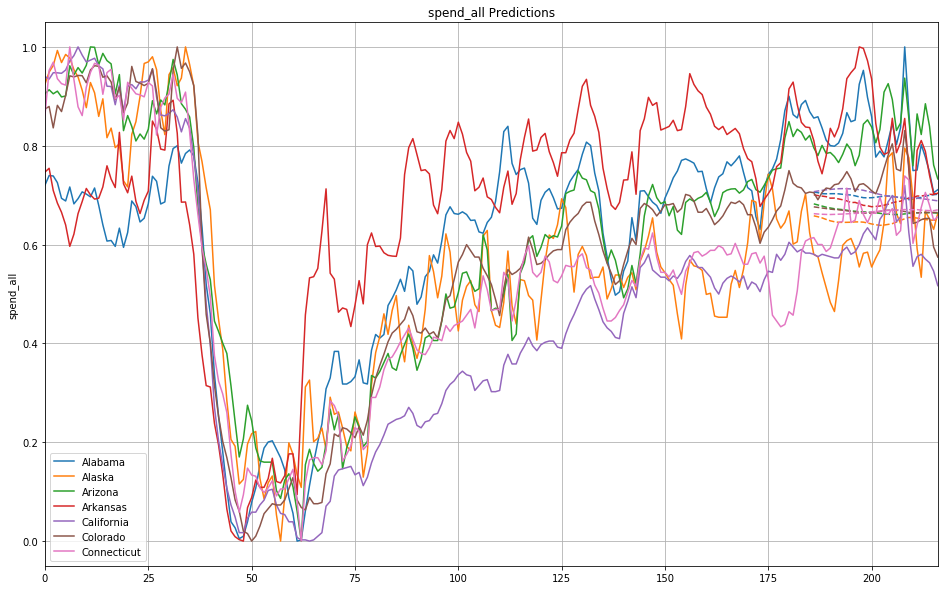

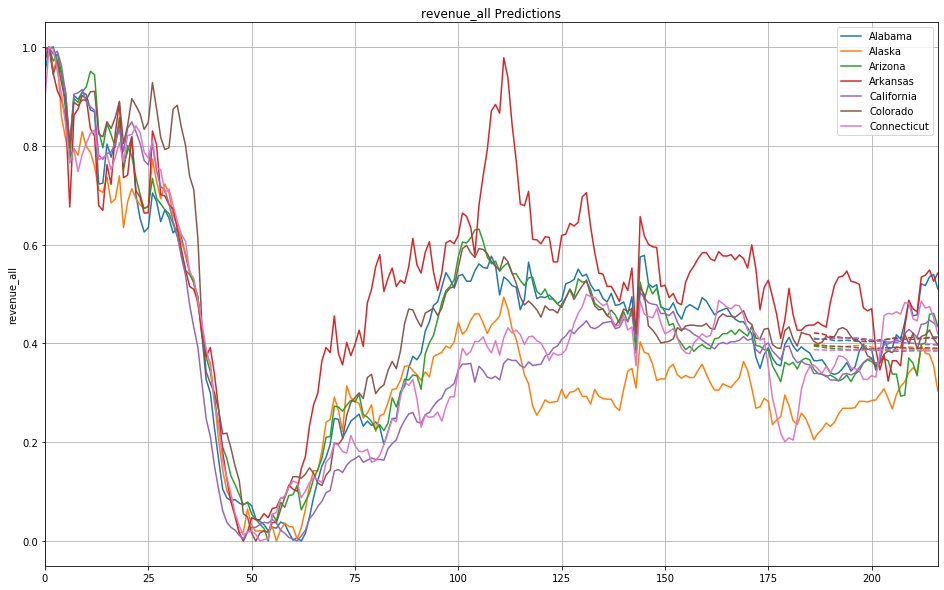

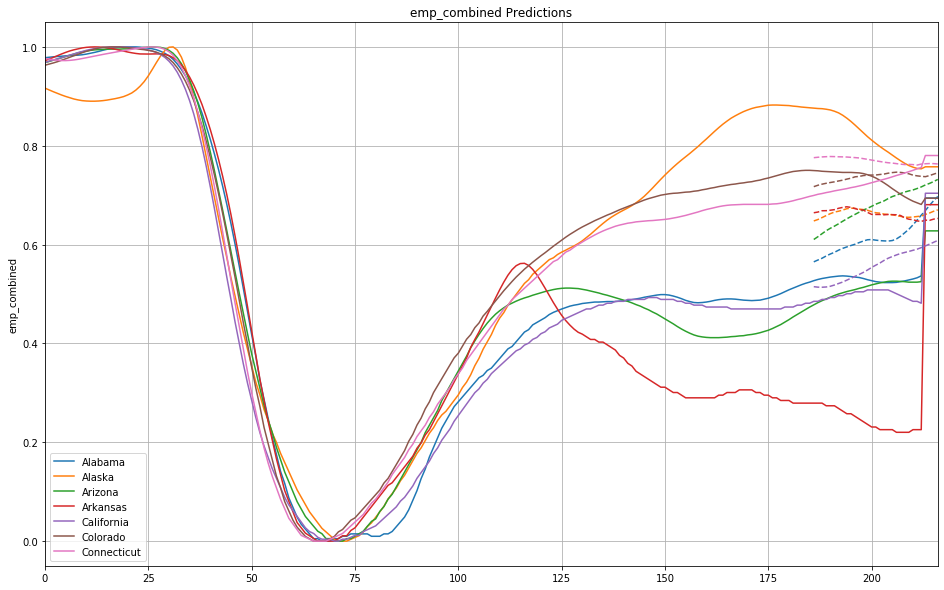

In [ ]:
col = 0
for column in test_outputs:
  plt.figure(figsize=(16,10))
  plt.title("{0} Predictions".format(column))
  plt.ylabel(column)
  plt.grid(True)
  plt.autoscale(axis='x', tight=True)

  train_size = df_covid_state.index.get_loc((1, train_date))

  x=np.arange(0,train_size+test_count,step=1)
  #print(targets[column].iloc[0:2])

  #print(targets_normalized[:,0:5])

  i = 0
  state_i = 0
  row_index = 0

  for state in states:
    date_count = df_inputs.loc[state].shape[0]
    if (state<10):
      #plt.plot(x, targetsAL_normalized[0:train_size+test_count, targetsAL.columns.get_loc(column)], color="b")
      plt.plot(x, torchTargets[row_index:row_index+train_size+test_count, df_econ_condensed.columns.get_loc(column)].cpu().numpy(), linestyle="-", color="C{0}".format(i), label=us.states.lookup("{0:02}".format(state)))
      plt.plot(x[train_size:train_size+test_count], predicted_outputs[state_i, df_econ_condensed.columns.get_loc(column), 0:test_count], linestyle="--", marker="o", markersize=0, color="C{0}".format(i))

      i += 1
    state_i += 1
    row_index += date_count

  #plt.plot(np.arange(train_size,train_size+test_count), test_outputs[column], color="C1")
  plt.legend()
  plt.savefig("figures/lstm-fullhistory-lag7-{0}.png".format(column))
  plt.show()

  col += 1